In [2]:
''' 
NCAR/UCAR training material
Questions? Contact: A. Kootz akootz@ucar.edu
'''

'''
In this tutorial we will make an image using prime numbers to create colors.
Colors are usually represented in 24 bits. 8 bits each of red, green, and blue. 
If we can find primes of less than 24 bits in length, and we can use them to make colors. 
Then based on the number of primes we find, we will factor that number to find a shape for our image.
Once we have the list of primes, and the shape of the image, we can produce and view it. 
'''
pass #we will use pass to make end_of_scope explicit.


In [3]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import time

from PIL import Image

In [8]:
# prime sieve function https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes
def prime_sieve(max_number):
    offset = -int(1)
    numbers = np.linspace(1,max_number,max_number,dtype=int)
    for number in numbers[1:]:
        if not number == 0: 
            for hole in range(2*number, max_number+1, number):
                numbers[hole+offset] = 0
            pass
        pass
    pass
    return numbers[numbers>0]
pass

10.798050160999992


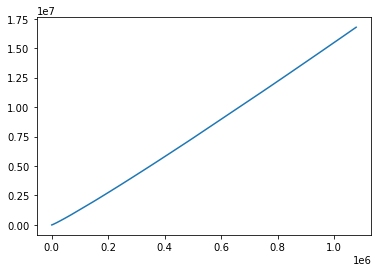

In [9]:
start = time.perf_counter()
primes = prime_sieve(2**24)
end = time.perf_counter()

print(end-start)

plt.plot(primes)
plt.show()

In [11]:
# integer factorization function https://en.wikipedia.org/wiki/Trial_division
def factors(number):
    limit = int(m.sqrt(number))
    factor_list = []
    for f1 in range(2,limit,1):
        if m.remainder(number, f1) == 0:
            f2 = int(number/f1)
            factor_list.append([f1,f2])
        pass
    pass
    return np.array(factor_list)
pass


In [15]:
factor_result = factors(len(primes))
print(f'list of possible image resolutions \n {factor_result}')
print(f'most square image resolution \n {factor_result[-1]}')
print(f'image ratio: {factor_result[-1][-1]/factor_result[-1][-2]}')
print(f'golden ratio: {(1+m.sqrt(5))/2}')


list of possible image resolutions 
 [[     2 538936]
 [     4 269468]
 [     8 134734]
 [    16  67367]
 [    23  46864]
 [    29  37168]
 [    46  23432]
 [    58  18584]
 [    92  11716]
 [   101  10672]
 [   116   9292]
 [   184   5858]
 [   202   5336]
 [   232   4646]
 [   368   2929]
 [   404   2668]
 [   464   2323]
 [   667   1616]
 [   808   1334]]
most square image resolution 
 [ 808 1334]
image ratio: 1.650990099009901
golden ratio: 1.618033988749895


In [18]:
# Array reshaping
height = factor_result[-1][0]
width = factor_result[-1][1]
primes_shape = primes.reshape((height,width))
print(f'shape of primes {primes.shape}')
print(f'shape of primes_shape {primes_shape.shape}')


shape of primes (1077872,)
shape of primes_shape (808, 1334)


In [19]:
# numpy array to image function
def image_from_array(array):
    img = array.tolist()
    for y in range(height):
        for x in range(width):
            argb = img[y][x]
            r = ((argb//(256*256))%256)/256 #red channel | floor division, multiplication, remainder, floating-point division
            g = ((argb//256)%256)/256
            b = ((argb)%256)/256
            img[y][x] = [r,g,b]
        pass
    pass
    return np.array(img)
pass

2.036623539000175


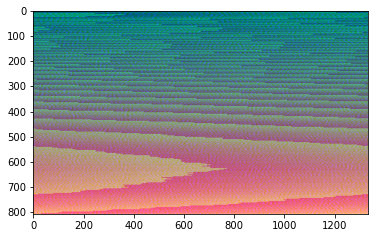

In [20]:
start = time.perf_counter()
image1 = image_from_array(primes_shape)
end = time.perf_counter()
print(end-start)

plt.imshow(image1)

In [24]:
# make an image we can save
image2 = np.array(image1*256, dtype=np.uint8)
image3 = Image.fromarray(image2)
image3.show()
image3.save('primes.png', compress_level=9)